# Consumer Price Index In Mongolia

Analyizing the inflation over the years and how they relate to the average prices of goods and services in Mongolia. We will feed the data into FbProphet, and see if we can predict prices over the next few years to see the overall direction of the Mongolian economy, and see if we can find anything else interesting along the way. 

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
!pip install -U scikit-learn
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
%matplotlib inline 
plt.rcParams['figure.figsize'] = (16,10)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the Data



In [68]:
df = pd.read_csv('/content/drive/MyDrive/Captone CPI/CPI.csv', thousands=',')

In [69]:
df

,Date,Overall index,Food and non-alcaholic beverages,Alcoholic beverages and tobacco,"Clothing, footwear and cloth","Housing, water, electricity and fuels","Furnishings, household equipment and tools",Health,Transport,Communication,Recreation and culture,Education services,Restaurants and hotels,Miscellaneous goods and services
0,1/1/06,35.9,33.1,30.9,34.9,36.0,39.5,38.4,45.2,108.4,66.9,20.5,29.9,42.2
1,2/1/06,36.1,33.5,31.0,34.9,36.1,39.7,38.4,45.3,108.3,67.0,20.5,29.9,42.2
2,3/1/06,36.2,33.9,30.9,35.0,35.9,39.8,38.5,45.3,97.3,67.6,20.5,30.0,42.3
3,4/1/06,37.1,35.8,31.0,35.1,35.9,39.9,38.8,45.3,96.7,67.6,20.7,30.2,42.3
4,5/1/06,37.5,36.6,30.9,35.1,36.2,39.9,38.8,46.0,92.2,68.4,20.7,30.3,43.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,7/1/22,156.5,183.9,137.2,146.2,156.3,149.1,165.7,148.2,102.2,137.5,148.2,162.9,154.2
199,8/1/22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,9/1/22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,10/1/22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning the Data

In [ ]:
df.dtypes

Date                                           object
Overall index                                 float64
Food and non-alcaholic beverages              float64
Alcoholic beverages and tobacco               float64
Clothing, footwear and cloth                  float64
Housing, water, electricity and fuels         float64
Furnishings, household equipment and tools    float64
Health                                        float64
Transport                                     float64
Communication                                 float64
Recreation and culture                        float64
Education services                            float64
    Restaurants and hotels                    float64
    Miscellaneous goods and services          float64
dtype: object

In [ ]:
#As we can see, all the data is in good format, and data type. All we have to do is change the date into date and time using pandas

In [70]:
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
df.dtypes

Date                                          datetime64[ns]
Overall index                                        float64
Food and non-alcaholic beverages                     float64
Alcoholic beverages and tobacco                      float64
Clothing, footwear and cloth                         float64
Housing, water, electricity and fuels                float64
Furnishings, household equipment and tools           float64
Health                                               float64
Transport                                            float64
Communication                                        float64
Recreation and culture                               float64
Education services                                   float64
    Restaurants and hotels                           float64
    Miscellaneous goods and services                 float64
dtype: object

In [ ]:
# Perfect now we have a clean data, that we can use to find out what the data means visually.

In [ ]:
df.isnull().sum()

Date                                          0
Overall index                                 4
Food and non-alcaholic beverages              4
Alcoholic beverages and tobacco               4
Clothing, footwear and cloth                  4
Housing, water, electricity and fuels         4
Furnishings, household equipment and tools    4
Health                                        4
Transport                                     4
Communication                                 4
Recreation and culture                        4
Education services                            4
    Restaurants and hotels                    4
    Miscellaneous goods and services          4
dtype: int64

In [ ]:
# The null counts of 4 each in each "goods variable" is from the missing inputs from the last 4 months,
# So we will just delete those as those values wont really affect our prediction.

In [71]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Date                                          0
Overall index                                 0
Food and non-alcaholic beverages              0
Alcoholic beverages and tobacco               0
Clothing, footwear and cloth                  0
Housing, water, electricity and fuels         0
Furnishings, household equipment and tools    0
Health                                        0
Transport                                     0
Communication                                 0
Recreation and culture                        0
Education services                            0
    Restaurants and hotels                    0
    Miscellaneous goods and services          0
dtype: int64

In [ ]:
# Good now, we have zero NaN values, which will let us proceed onto visualization

## EDA

In [ ]:
df.describe()

,Overall index,Food and non-alcaholic beverages,Alcoholic beverages and tobacco,"Clothing, footwear and cloth","Housing, water, electricity and fuels","Furnishings, household equipment and tools",Health,Transport,Communication,Recreation and culture,Education services,Restaurants and hotels,Miscellaneous goods and services
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,87.657789,90.359296,81.200503,83.590452,87.772362,86.374372,92.665829,91.215578,97.487940,97.983417,83.781407,85.303015,89.126131
std,31.683916,35.091111,33.881522,33.325808,34.320874,29.563279,32.151420,24.140025,5.227903,19.885868,44.319417,34.802187,29.811375
min,35.900000,33.100000,30.900000,34.900000,35.900000,39.500000,38.400000,45.200000,85.200000,66.900000,20.500000,29.900000,42.200000
25%,60.100000,60.350000,48.450000,51.950000,55.550000,60.900000,70.400000,73.300000,97.700000,84.400000,41.100000,56.250000,65.600000
50%,92.800000,94.000000,93.500000,89.200000,84.700000,90.600000,91.600000,94.400000,98.900000,92.400000,78.700000,94.900000,93.200000
75%,112.100000,109.250000,111.300000,108.650000,116.550000,111.200000,118.150000,110.350000,100.600000,108.750000,122.700000,106.750000,113.050000
max,156.500000,183.900000,137.200000,146.200000,156.300000,149.100000,165.700000,148.200000,108.400000,137.500000,148.200000,162.900000,154.200000


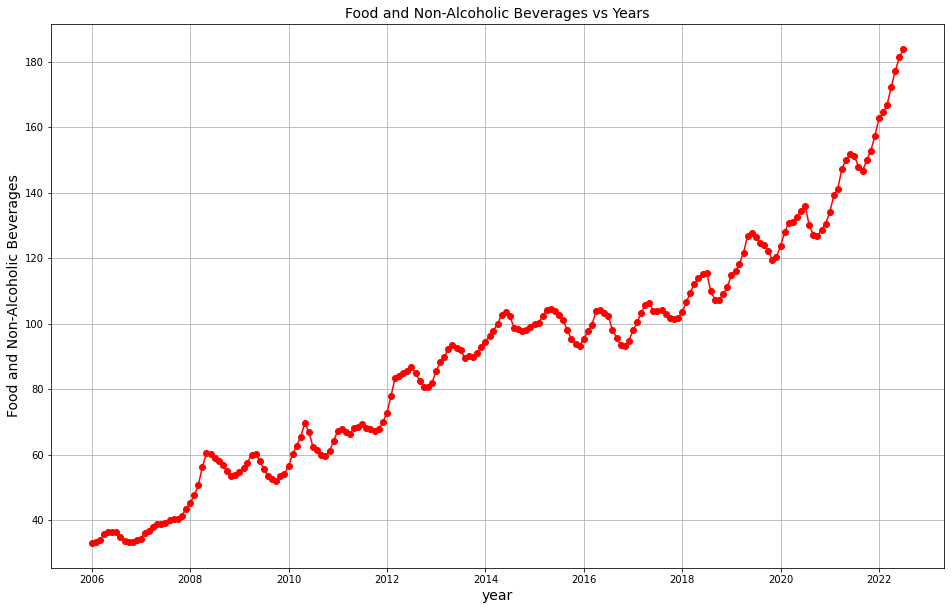

In [ ]:
plt.plot(df['Date'], df['Food and non-alcaholic beverages'], color='red', marker='o')
plt.title('Food and Non-Alcoholic Beverages vs Years', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.ylabel('Food and Non-Alcoholic Beverages', fontsize=14)
plt.grid(True)
plt.show()

As we can see, this is a graph of the price differences over the years for just Food and beverages excluded alcohol.

It shows a linear increase, which is predictable considering that countries all over the world get his with increasing inflation rates as time goes on...
This is crucial for our analysis because food and beverage prices are one of the main consumer products.

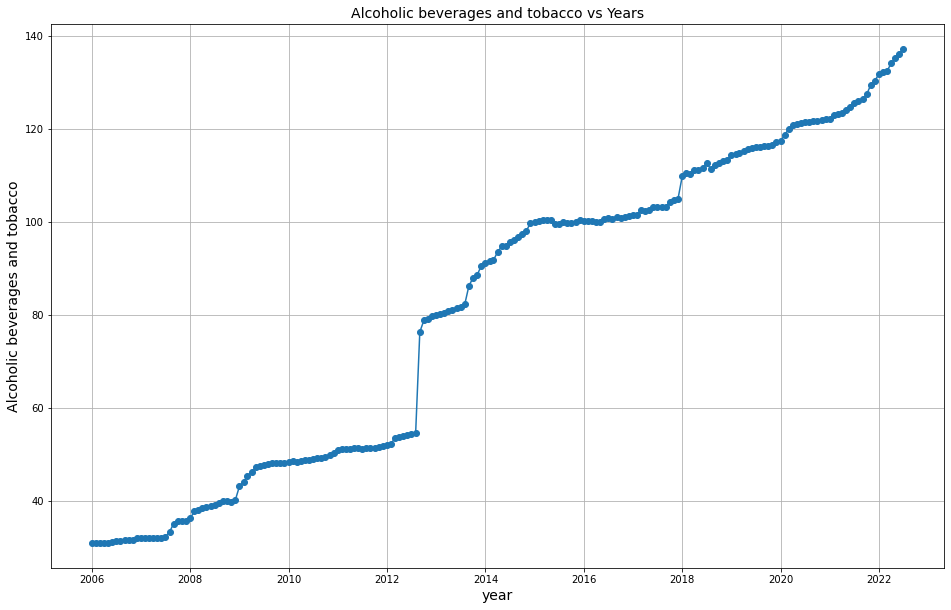

In [ ]:
plt.plot(df['Date'], df['Alcoholic beverages and tobacco'], marker='o')
plt.title('Alcoholic beverages and tobacco vs Years', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.ylabel('Alcoholic beverages and tobacco', fontsize=14)
plt.grid(True)
plt.show()

Now compared to the visual for food and beverages, we can see the differences. 
Although the values don't necessarily cost more than the 'food and non-alcoholic beverages', we can see that there was a hugh increase in 2013.

What does that mean specifically? What could cause the price of alcohol and tobacco to suddenly increase? 
Well after a little research, Mongolia introduced new tax laws for tobacco back in 2012, which is probably the cause for such a dramatic increase in CPI

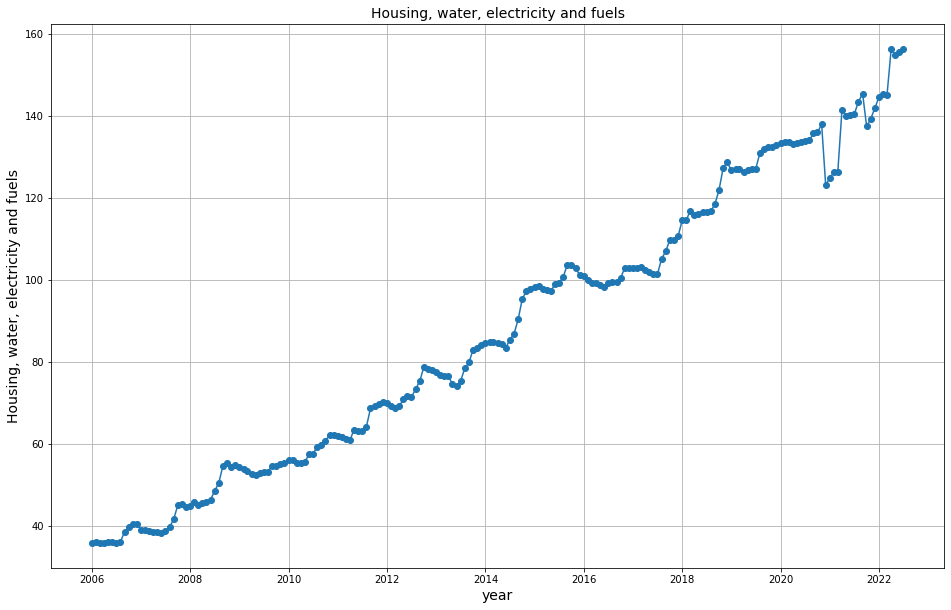

In [ ]:
plt.plot(df['Date'], df['Housing, water, electricity and fuels'], marker='o')
plt.title('Housing, water, electricity and fuels', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.ylabel('Housing, water, electricity and fuels', fontsize=14)
plt.grid(True)
plt.show()

Now as we look at the price changes for housing, water, electricity, and fuel we can see the steady linear incline. As expected, the CPI values over the last 17 years, is understandable. As the development of Mongolia increase, the prices for goods and services will increase along with inflation. 

The sudden drop of price in 2021, is when the government and top companies supported the citizens by paying electricity, and water bills for 6 months. 

And now in 2022, we are paying the increase in tax to repay those debts.

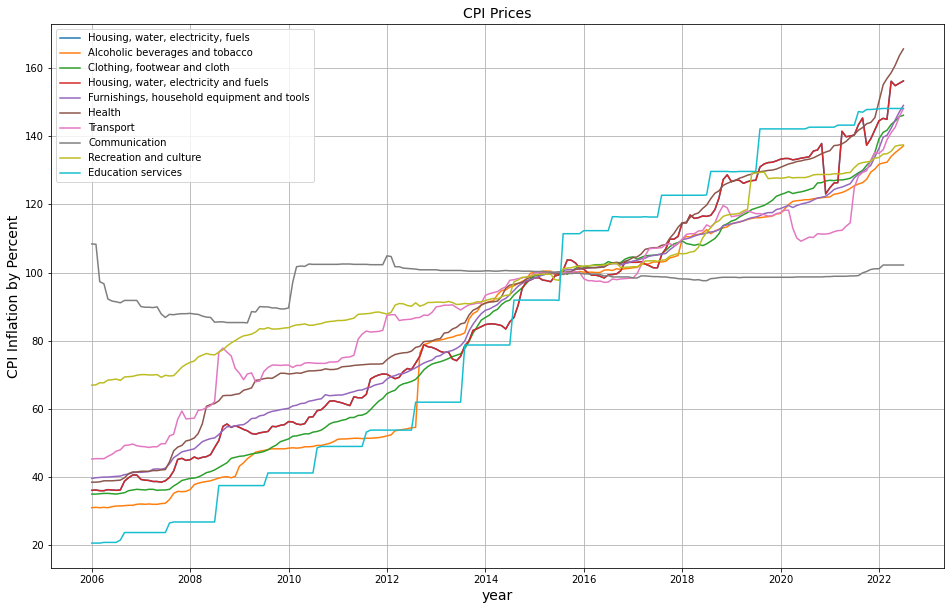

In [ ]:
plt.plot(df['Date'], df['Housing, water, electricity and fuels'], label= 'Housing, water, electricity, fuels')
plt.plot(df['Date'], df['Alcoholic beverages and tobacco'], label = 'Alcoholic beverages and tobacco')
plt.plot(df['Date'], df['Clothing, footwear and cloth'], label = 'Clothing, footwear and cloth')
plt.plot(df['Date'], df['Housing, water, electricity and fuels'], label ='Housing, water, electricity and fuels')
plt.plot(df['Date'], df['Furnishings, household equipment and tools'], label = 'Furnishings, household equipment and tools')
plt.plot(df['Date'], df['Health'], label = 'Health')
plt.plot(df['Date'], df['Transport'], label = 'Transport')
plt.plot(df['Date'], df['Communication'], label = 'Communication')
plt.plot(df['Date'], df['Recreation and culture'], label = 'Recreation and culture')
plt.plot(df['Date'], df['Education services'], label = 'Education services')
plt.title('CPI Prices', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.ylabel('CPI Inflation by Percent', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

As you can see, it hard to indentify which lines are what, but they all have linear increase, with the exception of comminication which is the only one that has remainded relatively stagnant. The variablity for communication is really low compared to the other variables, so of course it won't show the same linear incline over the years.

## So now lets do the predictions

We will start by seperating each variable that we want to predict by the values and date. We will rename the columns so our prediction model understands.

In this case we will make predictions for "Food and non-alcoholic beverages, Alcohol and tobacco, and lastly Housing, water, electricity and fuels". 

In [ ]:
df.head()

,Date,Overall index,Food and non-alcaholic beverages,Alcoholic beverages and tobacco,"Clothing, footwear and cloth","Housing, water, electricity and fuels","Furnishings, household equipment and tools",Health,Transport,Communication,Recreation and culture,Education services,Restaurants and hotels,Miscellaneous goods and services
0,2006-01-01,35.9,33.1,30.9,34.9,36.0,39.5,38.4,45.2,108.4,66.9,20.5,29.9,42.2
1,2006-02-01,36.1,33.5,31.0,34.9,36.1,39.7,38.4,45.3,108.3,67.0,20.5,29.9,42.2
2,2006-03-01,36.2,33.9,30.9,35.0,35.9,39.8,38.5,45.3,97.3,67.6,20.5,30.0,42.3
3,2006-04-01,37.1,35.8,31.0,35.1,35.9,39.9,38.8,45.3,96.7,67.6,20.7,30.2,42.3
4,2006-05-01,37.5,36.6,30.9,35.1,36.2,39.9,38.8,46.0,92.2,68.4,20.7,30.3,43.4


In [ ]:
FNB = df[['Date', 'Food and non-alcaholic beverages']].rename(columns={'Date':'ds', 'Food and non-alcaholic beverages':'y'})

In [ ]:
FNB.head()

,ds,y
0,2006-01-01,33.1
1,2006-02-01,33.5
2,2006-03-01,33.9
3,2006-04-01,35.8
4,2006-05-01,36.6


In [ ]:
FNB.to_csv('/content/drive/MyDrive/Captone CPI/food and non-alchoholic beverages.csv')
# Converting to CSV file in google drive, to upload files later to streamlit #

In [ ]:
AT = df[['Date', 'Alcoholic beverages and tobacco']].rename(columns={'Date':'ds', 'Alcoholic beverages and tobacco':'y'})

In [ ]:
AT.to_csv('/content/drive/MyDrive/Captone CPI/alcohol and tobacco.csv')


In [ ]:
AT.head()

,ds,y
0,2006-01-01,30.9
1,2006-02-01,31.0
2,2006-03-01,30.9
3,2006-04-01,31.0
4,2006-05-01,30.9


In [ ]:
HWEF = df[['Date', 'Housing, water, electricity and fuels']].rename(columns={'Date':'ds', 'Housing, water, electricity and fuels':'y'})

In [ ]:
HWEF.to_csv('/content/drive/MyDrive/Captone CPI/housing, water, electricity, fuels.csv')


In [ ]:
HWEF.head()

# Converting all the data in each column to csv files to run predictions on Streamlit

In [ ]:
df.head()

In [ ]:
#overall = df[['Date', 'Overall index']].rename(columns={'Date':'ds', 'Overall index':'y'})

In [ ]:
#overall.to_csv('/content/drive/MyDrive/Captone CPI/overall Index.csv')

In [72]:
CFC = df[['Date', 'Clothing, footwear and cloth']].rename(columns={'Date':'ds', 'Clothing, footwear and cloth':'y'})

In [73]:
CFC.to_csv('/content/drive/MyDrive/Captone CPI/clothing, footwear, and cloth.csv')

In [74]:
FET = df[['Date', 'Furnishings, household equipment and tools']].rename(columns={'Date':'ds', 'urnishings, household equipment and tools':'y'})

In [75]:
FET.to_csv('/content/drive/MyDrive/Captone CPI/furnishings, household equipment and tools.csv')

In [76]:
health = CFC = df[['Date', 'Health']].rename(columns={'Date':'ds', 'Health':'y'})

In [77]:
health.to_csv('/content/drive/MyDrive/Captone CPI/health.csv')

In [78]:
comm = df[['Date', 'Communication']].rename(columns={'Date':'ds', 'Communication':'y'})

In [79]:
comm.to_csv('/content/drive/MyDrive/Captone CPI/communications.csv')

In [80]:
transport = df[['Date', 'Transport']].rename(columns={'Date':'ds', 'Transport':'y'})

In [81]:
transport.to_csv('/content/drive/MyDrive/Captone CPI/transport.csv')

In [82]:
RNC= df[['Date', 'Recreation and culture']].rename(columns={'Date':'ds', 'Recreation and culture':'y'})

In [84]:
RNC.to_csv('/content/drive/MyDrive/Captone CPI/recreation and culture.csv')

In [85]:
ES= df[['Date', 'Education services']].rename(columns={'Date':'ds', 'Education services':'y'})

In [86]:
ES.to_csv('/content/drive/MyDrive/Captone CPI/education services.csv')

Now that we have the data in the correct form for prophet fitting, we can go ahead and use phophet to run predictions on each of those variables (FNB, AT, HWEF).

## Prophet Fitting 

In [ ]:
first = Prophet()
first.fit(FNB)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_lg6lxuk/q8ea85f8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_lg6lxuk/c1i416ck.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97130', 'data', 'file=/tmp/tmp_lg6lxuk/q8ea85f8.json', 'init=/tmp/tmp_lg6lxuk/c1i416ck.json', 'output', 'file=/tmp/tmp_lg6lxuk/prophet_model4k6qkqhg/prophet_model-20221219163404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:34:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:34:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
second = Prophet()
second.fit(AT)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_lg6lxuk/n1yaieuq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_lg6lxuk/aayrh3mu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98393', 'data', 'file=/tmp/tmp_lg6lxuk/n1yaieuq.json', 'init=/tmp/tmp_lg6lxuk/aayrh3mu.json', 'output', 'file=/tmp/tmp_lg6lxuk/prophet_modelkt89kuua/prophet_model-20221219163421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:34:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:34:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
third = Prophet()
third.fit(HWEF)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_lg6lxuk/mt2djycn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_lg6lxuk/mihoryby.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=595', 'data', 'file=/tmp/tmp_lg6lxuk/mt2djycn.json', 'init=/tmp/tmp_lg6lxuk/mihoryby.json', 'output', 'file=/tmp/tmp_lg6lxuk/prophet_modeld0n2fq3k/prophet_model-20221219163438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:34:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:34:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Predictions

In [ ]:
future_FNB = first.make_future_dataframe(periods =36, freq='MS')

In [ ]:
forecast_FNB = first.predict(future_FNB)
forecast_FNB[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2006-01-01,29.036155,24.516077,33.537570
1,2006-02-01,31.248797,26.673048,35.697547
2,2006-03-01,33.357710,29.054050,37.361646
3,2006-04-01,35.817519,31.440039,40.185030
4,2006-05-01,37.885827,33.287114,42.386892
...,...,...,...,...
230,2025-03-01,208.803888,201.922625,215.430837
231,2025-04-01,212.228282,204.703861,219.181409
232,2025-05-01,214.678447,207.021416,222.040557
233,2025-06-01,215.286128,207.578900,222.498114


In [ ]:
future_AT = second.make_future_dataframe(periods=36, freq='MS')

In [ ]:
forecast_AT = second.predict(future_AT)
forecast_AT[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2006-01-01,28.774785,25.630243,32.241872
1,2006-02-01,29.191490,26.038600,32.585159
2,2006-03-01,29.430259,26.262692,32.606737
3,2006-04-01,29.540794,26.324350,32.836559
4,2006-05-01,29.641808,26.713706,32.776177
...,...,...,...,...
230,2025-03-01,147.936175,140.931693,155.161160
231,2025-04-01,148.544338,141.085124,155.418952
232,2025-05-01,148.912088,141.473739,156.533440
233,2025-06-01,149.137577,141.121652,157.033784


In [ ]:
future_HWEF = third.make_future_dataframe(periods=36, freq='MS')

In [ ]:
forecast_HWEF = third.predict(future_HWEF)
forecast_HWEF[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2006-01-01,34.229477,29.911465,38.497437
1,2006-02-01,34.202709,29.957942,38.669911
2,2006-03-01,33.813296,29.405022,38.109299
3,2006-04-01,35.054190,30.315231,39.342205
4,2006-05-01,35.098773,30.805541,39.557310
...,...,...,...,...
230,2025-03-01,170.656296,166.124641,175.008314
231,2025-04-01,171.996397,167.686332,176.612268
232,2025-05-01,171.824341,167.640586,176.377439
233,2025-06-01,172.078557,167.353696,176.812431


As we can see, our predictions were successfull and for the three variables we chose to predict, we have predictions all the way up to july, 2025.

Now lets analyse these visually. 

# Prediction Visual

In [ ]:
plot_plotly(first, forecast_FNB)

If we look at the graph for future predictions for just food and non-alcoholic beverages, the average price for FNB is 183.9 in july 2022.

Our predicition for the next three years, show a steady increase. 

So how is this information useful, we can assume that these prices are accurate, due to FBprophet. This information can be useful to people that want to predict the prices, and either for stores to plan ahead for large bulk orders or everyday people to visually see how much expensive things will continue to get.

In [ ]:
plot_plotly(second, forecast_AT)

Predictions for alcohol and tobacco are similar to food and non-alcoholic beverages. A Linear increase, which makes sense because inflation across the world is increasing due to the pandemic and wars between countries that provide our fossil fuels and natural resources

In [ ]:
plot_plotly(third, forecast_HWEF)

The predictions for housing, water, electricity and fuels also share the same story, increase in price changes due to inflation, war and COVID-19

# Total Prediction

In [ ]:
forecast2_FNB = forecast_FNB.rename(columns={'yhat': 'FNB'})
forecast2_AT = forecast_AT.rename(columns={'yhat': 'AT'})
forecast2_HWEF = forecast_HWEF.rename(columns={'yhat':'HWEF'})

In [ ]:
total_forecast = pd.DataFrame()

In [ ]:
total_forecast['Date'] = forecast2_FNB['ds']
total_forecast['FNB'] = forecast2_FNB['FNB']
total_forecast['AT'] = forecast2_AT['AT']
total_forecast['HWEF'] = forecast2_HWEF['HWEF']

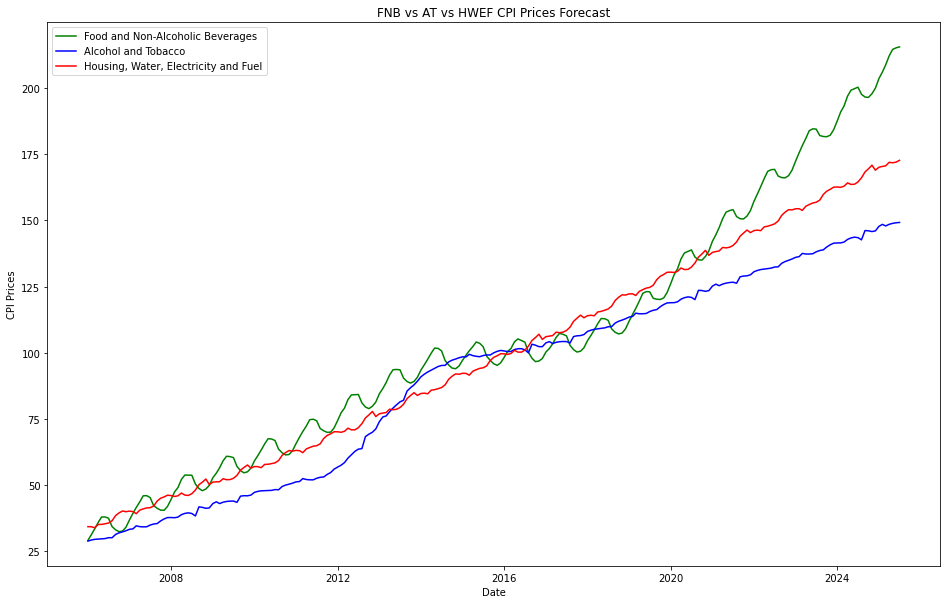

In [ ]:
plt.plot(total_forecast['Date'], total_forecast['FNB'], color='green', label = 'Food and Non-Alcoholic Beverages')
plt.plot(total_forecast['Date'], total_forecast['AT'], color='blue', label = 'Alcohol and Tobacco')
plt.plot(total_forecast['Date'], total_forecast['HWEF'], color='red', label = 'Housing, Water, Electricity and Fuel')
plt.xlabel('Date')
plt.ylabel('CPI Prices')
plt.title('FNB vs AT vs HWEF CPI Prices Forecast')
plt.rcParams['figure.figsize'] = (16,10)
plt.legend()
plt.show()

From this visual, we can see the three variables chosen (Food and non-alcaholic beverages, Alcohol and Tobacco, and Housing, Water, Electricity and Fuel). This allows us to look at each consumer good/sector side by side, which is a little easier than reading the above visuals.

# Conclusion

When we look at the big picture, for FNB, AT, and HWEF  they all show valid and realistic predictions. For the next three years, we can safely assume that due to uncontrollable factors, the prices for goods and services will keep increasing, and overall the people living in Mongolia will sooner or later not be able to afford it. 

The fact that Mongolia has a clause in the Labor Law of Mongolia that states "employers must take into consideration of inflation and population increase" when it comes to determining or redetermining salary and yet, we still see employees with the same monthly and annual salary with zero increase shows that Mongolia in terms of economy is in a downfall. 

Add on the national dept that Mongolia has, it's very hard to see an optimistic future, were an individual can thrive and increase economic welfare for all. Mongolia's GDP is ranked 130 in the World GDP rank.

I can see why now, most of the younger generation of Mongolian citizens opt to leave the country and chose to live outside Mongolia, because at the rate of our development, the country is not appealing to say the least. 

At this rate, Mongolia as a country is developing too slowly to keep up with the rest of the world, it's sad to say but life in Mongolia will only get harder, and the older generation who experienced this change first hand will tell you that, even though the country has made giant developments, the country overall is in bad shape. 